In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# The Goal is to predict whether a person has an income of more than 50K a year or not.

In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


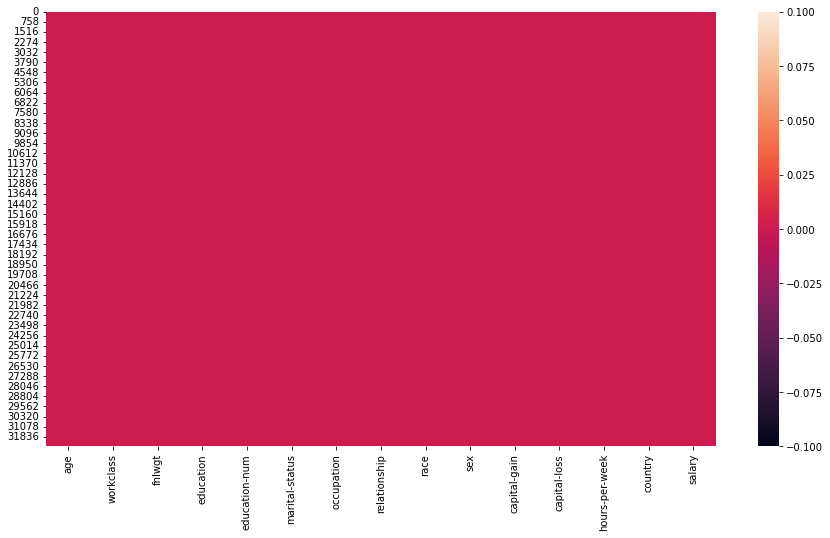

In [7]:
# checking the missing values
plt.figure(figsize=(15,8))
sb.heatmap(df.isnull())
plt.show()

In [8]:
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].unique(),sep='/n')

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' 

In [9]:
df['workclass']=df['workclass'].apply(lambda x: np.nan if x==' ?' else x)

df['occupation']=df['occupation'].apply(lambda x: np.nan if x==' ?' else x)

df['country']=df['country'].apply(lambda x: np.nan if x==' ?' else x)

df.dropna(how='any',inplace=True)

In [10]:
df.shape

(30162, 15)

In [11]:
df['workclass']=df['workclass'].str.replace(' ','')

df.loc[(df['workclass']=='State-gov')|(df['workclass']=='Local-gov')|(df['workclass']=='Federal-gov'),'workclass']='Government'

df.loc[(df['workclass']=='Self-emp-not-inc')|(df['workclass']=='Self-emp-inc'),'workclass']='self employee'

df.loc[(df['workclass']=='Never-worked'),'workclass']='Without-pay'

In [12]:
df['education']=df['education'].str.replace(' 1st-4th','primary').str.replace(' 5th-6th','middle').str.replace(' 7th-8th','middle')

In [13]:
df.loc[(df['education']==' 9th') | (df['education']==' 10th'),'education']='secondary'

df.loc[(df['education']==' 11th') | (df['education']==' 12th'),'education']='secondary'

df.loc[(df['education']==' HS-grad'),'education']='secondary'

df['education']=df['education'].str.replace(' ','')

In [14]:
df.loc[(df['education']=='Assoc-acdm') | (df['education']=='Assoc-voc'),'education']='Associates'

df.loc[(df['education']=='Some-college'),'education']='Bachelors'

In [15]:
df['education'].unique()

array(['Bachelors', 'secondary', 'Masters', 'Associates', 'middle',
       'Doctorate', 'Prof-school', 'Preschool', 'primary'], dtype=object)

In [16]:
df.loc[(df['marital-status']==' Married-civ-spouse')|(df['marital-status']==' Married-spouse-absent')|
       (df['marital-status']==' Married-AF-spouse'),'marital-status']='Married'

In [17]:
df['marital-status']=df['marital-status'].replace(' Never-married','single')

df['marital-status']=df['marital-status'].replace([' Divorced',' Separated'],'Divorced')

In [18]:
df['marital-status']=df['marital-status'].str.replace(' ','')

df['occupation']=df['occupation'].str.replace(' ','')

df['relationship']=df['relationship'].str.replace(' ','')

df['sex']=df['sex'].str.replace(' ','')

df['country']=df['country'].str.replace(' ','')

df['race']=df['race'].str.replace(' ','')

In [19]:
df['salary']=df['salary'].str.replace(' ','').str.replace('K','')

In [20]:
df.rename(columns={'education-num':'education_num','marital-status':'marital_status','capital-gain':'capital_gain',
                   'capital-loss':'capital_loss','hours-per-week':'hours_per_week'},inplace=True)

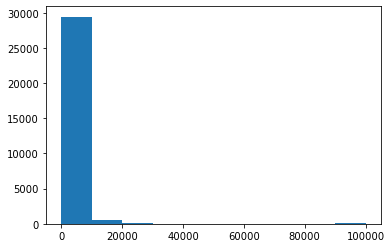

In [21]:
plt.hist(df['capital_gain'])
plt.show()

In [22]:
df['capital_gain']=df['capital_gain'].apply(lambda x: 1 if x>0 else 0)

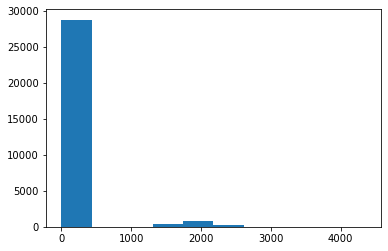

In [23]:
plt.hist(df['capital_loss'])
plt.show()

In [24]:
df['capital_loss']=df['capital_loss'].apply(lambda x: 1 if x>0 else 0)

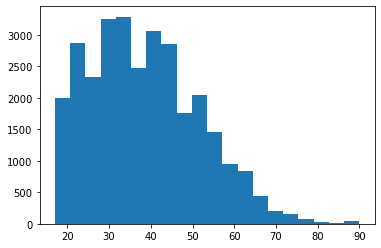

In [25]:
plt.hist(df['age'],bins=20)
plt.show()

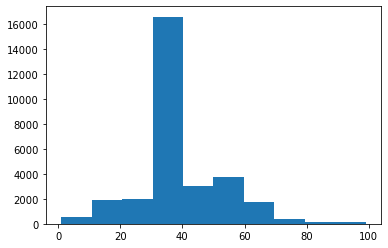

In [26]:
plt.hist(df['hours_per_week'])
plt.show()

In [27]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,Government,77516,Bachelors,13,single,Adm-clerical,Not-in-family,White,Male,1,0,40,United-States,<=50
1,50,self employee,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50
2,38,Private,215646,secondary,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50
3,53,Private,234721,secondary,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50


In [28]:
df.drop(['fnlwgt','relationship'],axis=1,inplace=True)

In [29]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,Government,Bachelors,13,single,Adm-clerical,White,Male,1,0,40,United-States,<=50
1,50,self employee,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,United-States,<=50
2,38,Private,secondary,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50
3,53,Private,secondary,7,Married,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50
4,28,Private,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,Cuba,<=50


In [30]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'country', 'salary'],
      dtype='object')

In [31]:
df.loc[(df['occupation']=='Adm-clerical'),'occupation']='Admin'

df.loc[(df['occupation']=='Other-service')|(df['occupation']=='Protective-serv')|(df['occupation']=='Priv-house-serv'),'occupation']='Service'


In [32]:
df.loc[(df['occupation']=='Exec-managerial'),'occupation']='Manager'
df.loc[(df['occupation']=='Prof-specialty'),'occupation']='Professional'
df.loc[(df['occupation']=='Armed-Forces'),'occupation']='Military'
df.loc[(df['occupation']=='Farming-fishing'),'occupation']='Farmer'
df.loc[(df['occupation']=='Tech-support'),'occupation']='Technical'
df.loc[(df['occupation']=='Handlers-cleaners')|(df['occupation']=='Transport-moving')| 
      (df['occupation']=='Machine-op-inspct')|(df['occupation']=='Craft-repair'),'occupation']='Other occupation'

In [33]:
df.loc[(df['race']=='Service')|(df['race']=='Asian-Pac-Islander')|(df['race']=='Amer-Indian-Eskimo'),'race']='Other'

In [34]:
df['salary']=df['salary'].apply(lambda x: 1 if x=='>50' else 0)

In [35]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,Government,Bachelors,13,single,Admin,White,Male,1,0,40,United-States,0
1,50,self employee,Bachelors,13,Married,Manager,White,Male,0,0,13,United-States,0
2,38,Private,secondary,9,Divorced,Other occupation,White,Male,0,0,40,United-States,0
3,53,Private,secondary,7,Married,Other occupation,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married,Professional,Black,Female,0,0,40,Cuba,0


In [36]:
df.corr()

,age,education_num,capital_gain,capital_loss,hours_per_week,salary
age,1.000000,0.043526,0.116976,0.054444,0.101599,0.241998
education_num,0.043526,1.000000,0.117001,0.076178,0.152522,0.335286
capital_gain,0.116976,0.117001,1.000000,-0.067547,0.077875,0.266053
capital_loss,0.054444,0.076178,-0.067547,1.000000,0.048703,0.137889
hours_per_week,0.101599,0.152522,0.077875,0.048703,1.000000,0.229480
salary,0.241998,0.335286,0.266053,0.137889,0.229480,1.000000


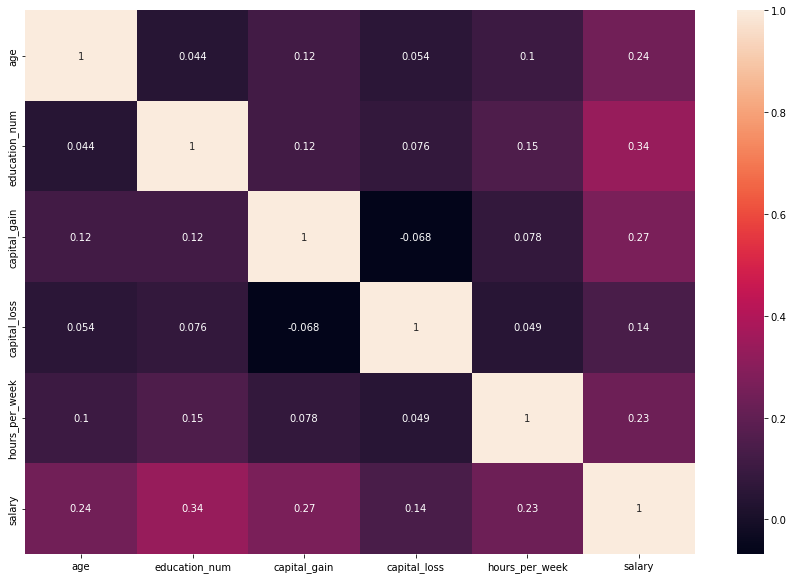

In [37]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [38]:
df['country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [39]:
df.head(33)

,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,Government,Bachelors,13,single,Admin,White,Male,1,0,40,United-States,0
1,50,self employee,Bachelors,13,Married,Manager,White,Male,0,0,13,United-States,0
2,38,Private,secondary,9,Divorced,Other occupation,White,Male,0,0,40,United-States,0
3,53,Private,secondary,7,Married,Other occupation,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married,Professional,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,14,Married,Manager,White,Female,0,0,40,United-States,0
6,49,Private,secondary,5,Married,Service,Black,Female,0,0,16,Jamaica,0
7,52,self employee,secondary,9,Married,Manager,White,Male,0,0,45,United-States,1
8,31,Private,Masters,14,single,Professional,White,Female,1,0,50,United-States,1
9,42,Private,Bachelors,13,Married,Manager,White,Male,1,0,40,United-States,1


In [40]:
df.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
country           object
salary             int64
dtype: object

In [41]:
x=df.drop('salary',axis=1)
y=df['salary']

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [43]:
xtrain

,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,country
8233,37,Government,secondary,9,single,Service,White,Female,0,0,40,United-States
21701,26,Private,Bachelors,13,Married,Admin,White,Female,0,0,40,United-States
22740,25,Private,secondary,9,single,Sales,Black,Male,0,0,40,United-States
24732,47,Private,secondary,9,Married,Other occupation,White,Male,0,0,85,United-States
30436,51,Private,Associates,11,single,Manager,White,Female,0,0,43,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
1242,36,Government,secondary,9,Widowed,Manager,White,Female,0,0,40,United-States
10077,58,Private,secondary,5,Divorced,Farmer,Black,Male,0,0,40,United-States
13572,46,Private,secondary,9,Married,Admin,White,Female,0,0,40,United-States
22888,22,Private,secondary,9,single,Admin,Black,Male,0,0,40,United-States


In [44]:
xtest

,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,country
23046,39,Private,secondary,9,Married,Other occupation,White,Male,0,0,40,United-States
22140,37,self employee,Bachelors,13,Married,Technical,White,Male,0,0,40,United-States
15060,31,Private,secondary,9,Divorced,Sales,White,Female,0,0,32,United-States
5322,19,Private,secondary,9,single,Sales,White,Female,0,0,40,United-States
7293,34,Private,secondary,7,single,Service,White,Female,0,0,40,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...
12275,35,Private,Bachelors,10,Divorced,Other occupation,Other,Male,0,0,40,United-States
21630,61,Private,Prof-school,15,Married,Manager,White,Male,0,0,20,United-States
23534,17,Private,secondary,7,single,Other occupation,White,Male,0,0,30,United-States
28072,46,Government,Masters,14,Married,Professional,White,Male,0,0,40,United-States


In [45]:
# Pipeline

In [46]:
cat_features=df.select_dtypes(include=['object']).columns
cat_features

Index(['workclass', 'education', 'marital_status', 'occupation', 'race', 'sex',
       'country'],
      dtype='object')

In [47]:
for i in cat_features:
    print(i,df[i].nunique())

workclass 4
education 9
marital_status 4
occupation 9
race 3
sex 2
country 41


In [48]:
step1=ColumnTransformer([('one_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,4,5,6,7,11])],
                        remainder='passthrough')
step2=ColumnTransformer([('scaler',StandardScaler(),slice(0,77))])
step3=DecisionTreeClassifier(criterion='gini',max_depth=8)

In [49]:
pipe=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

In [50]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 4, 5, 6, 7, 11])])),
                ('step2',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  slice(0, 77, None))])),
                ('step3', DecisionTreeClassifier(max_depth=8))])

In [51]:
ypred=pipe.predict(xtest)
ypred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [52]:
accuracy_score(ypred,ytest)

0.8350737609812697

In [53]:
params={'step3__max_depth':[2,3,4,5,6,7,8],'step3__criterion':["gini", "entropy"]}

In [54]:
grid=GridSearchCV(pipe,param_grid=params,cv=5,scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('step1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1, 2,
                                                                          4, 5,
                                                                          6, 7,
                                                                          11])])),
                                       ('step2',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         slice(0, 77, None))])),
                                       ('step3',
                                        DecisionTreeClassifier(max_depth=8))]),
             param_grid={'step3__criterion': ['gini', 'entropy'],
                         'step3__max_depth': [2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [55]:
grid.best_params_

{'step3__criterion': 'gini', 'step3__max_depth': 8}

In [56]:
grid.best_score_

0.8328031371224842

In [57]:
import pickle

In [58]:
pickle.dump(pipe,open('dt_pipe.pkl','wb'))

In [59]:
dtpipe=pickle.load(open('dt_pipe.pkl','rb'))

In [60]:
inp=x.iloc[8,:].values.reshape(1,-1)
inp

array([[31, 'Private', 'Masters', 14, 'single', 'Professional', 'White',
        'Female', 1, 0, 50, 'United-States']], dtype=object)

In [61]:
dtpipe.predict(inp)

array([1], dtype=int64)

In [62]:
# Randomforest Pipeline

In [63]:
step1=ColumnTransformer([('one_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,4,5,6,7,11])],
                        remainder='passthrough')
step2=ColumnTransformer([('scaler',StandardScaler(),slice(0,77))])
step3=RandomForestClassifier(n_estimators=11,criterion='gini',max_depth=9,max_features='auto')

In [64]:
pipe1=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

In [65]:
pipe1.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 4, 5, 6, 7, 11])])),
                ('step2',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  slice(0, 77, None))])),
                ('step3',
                 RandomForestClassifier(max_depth=9, max_features='auto',
                                        n_estimators=11))])

In [66]:
ypred=pipe1.predict(xtest)
ypred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [67]:
accuracy_score(ypred,ytest)

0.834410740924913

In [68]:
params={'step3__max_depth':[2,3,4,5,6,7,8,9],'step3__criterion':['gini','entropy'],'step3__n_estimators':[3,5,7,9,11],
       'step3__max_features':['sqrt','log2','auto']}

In [69]:
grid=GridSearchCV(pipe1,param_grid=params,cv=5,scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('step1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1, 2,
                                                                          4, 5,
                                                                          6, 7,
                                                                          11])])),
                                       ('step2',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         slice(0, 77, None))])),
                                       ('step3',
                                        RandomForestClassifier(max_depth=9,
                                                               max_features='auto',
                                                               n_estimators=11))]),
             param_grid={'step3__criterion': ['gini', 'entropy'],
                         'step3__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'step3__max_features': ['sqrt', 'log2', 'auto'],
                         'step3__n_estimators': [3, 5, 7, 9, 11]},
             scoring='accuracy')

In [70]:
grid.best_params_

{'step3__criterion': 'gini',
 'step3__max_depth': 9,
 'step3__max_features': 'auto',
 'step3__n_estimators': 9}

In [71]:
grid.best_score_

0.8337315245812047

In [72]:
# KNN pipeline

In [73]:
step1=ColumnTransformer([('one_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,4,5,6,7,11])],
                        remainder='passthrough')
step2=ColumnTransformer([('scaler',StandardScaler(),slice(0,77))])
step3=KNeighborsClassifier()

In [74]:
pipe2=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

In [75]:
pipe2.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 4, 5, 6, 7, 11])])),
                ('step2',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  slice(0, 77, None))])),
                ('step3', KNeighborsClassifier())])

In [76]:
ypred=pipe2.predict(xtest)
ypred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [77]:
accuracy_score(ypred,ytest)

0.8155146693187469

In [78]:
#AdaBoost

In [79]:
step1=ColumnTransformer([('one_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,4,5,6,7,11])],
                        remainder='passthrough')
step2=ColumnTransformer([('scaler',StandardScaler(),slice(0,77))])
step3=AdaBoostClassifier(n_estimators=500,learning_rate=0.4)

In [80]:
pipe3=Pipeline([('step1',step1),
              ('step2',step2),
              ('step3',step3)])

In [81]:
pipe3.fit(x,y)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 4, 5, 6, 7, 11])])),
                ('step2',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  slice(0, 77, None))])),
                ('step3',
                 AdaBoostClassifier(learning_rate=0.4, n_estimators=500))])

In [82]:
ypred=pipe3.predict(xtest)
ypred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [83]:
accuracy_score(ypred,ytest)

0.8458478368970661

In [96]:
pickle.dump(pipe3,open('ADB_pipe.pkl','wb'))

In [97]:
ADBpipe=pickle.load(open('ADB_pipe.pkl','rb'))

In [106]:
inp=x.iloc[19,:].values.reshape(1,-1)
inp

array([[40, 'Private', 'Doctorate', 16, 'Married', 'Professional',
        'White', 'Male', 0, 0, 60, 'United-States']], dtype=object)

In [107]:
ADBpipe.predict(inp)

array([1], dtype=int64)

In [84]:
params={'step3__n_estimators':[50,100,250,500,750,1000],'step3__learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [85]:
grid=GridSearchCV(pipe3,param_grid=params,cv=5,scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('step1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1, 2,
                                                                          4, 5,
                                                                          6, 7,
                                                                          11])])),
                                       ('step2',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         slice(0, 77, None))])),
                                       ('step3',
                                        AdaBoostClassifier(learning_rate=0.4,
                                                           n_estimators=500))]),
             param_grid={'step3__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9],
                         'step3__n_estimators': [50, 100, 250, 500, 750, 1000]},
             scoring='accuracy')

In [86]:
grid.best_params_

{'step3__learning_rate': 0.4, 'step3__n_estimators': 500}

In [87]:
grid.best_score_

0.8386051726556107